In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from scipy.io import loadmat
from PIL import Image
import cv2

In [2]:
matfile = loadmat("../original_data/imdb-animalParts-eye.mat")

In [3]:
matfile.keys()

dict_keys(['__header__', '__version__', '__globals__', 'images', 'bbx', 'kp', 'classes', 'imageDir'])

In [4]:
image_names = matfile["images"]["name"][0][0][0]
image_id = matfile["images"]["id"][0][0][0]
bbx_id = matfile["bbx"]["id"][0][0][0]
bbx_imageId = matfile["bbx"]["imageId"][0][0][0]
kp_boxId = matfile["kp"]["boxId"][0][0][0]
kp_pos = matfile["kp"]["pos"][0][0].T

In [5]:
img_idx = 2
im_name = image_names[img_idx][0]
im_dir = im_name.split("/")[0]
if im_dir == "train":
    img_path = f"/data/dataset/imagenet/{image_names[img_idx][0]}"
elif im_dir == "val":
    img_path = f"/data/dataset/imagenet/ILSVRC2012_{image_names[img_idx][0]}"
im = np.array(Image.open(img_path))

im_id = image_id[img_idx]
kp_indices = bbx_id[im_id == bbx_imageId][0] == kp_boxId
num_kp = np.sum(kp_indices)
eye_pos = kp_pos[kp_indices]

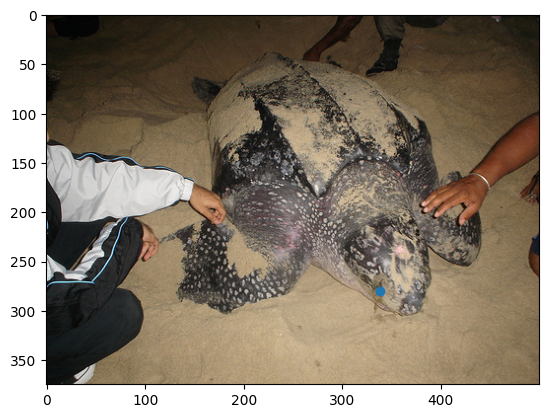

In [6]:
plt.imshow(im)
plt.scatter(eye_pos[0][0], eye_pos[0][1])

In [7]:
rh, rw = 256, 256
mean_eye_pos = np.mean(eye_pos, axis=0)

h, w, _ = im.shape
min_hw = min(h, w)
eye_pos_shift = np.copy(eye_pos)
if h == min_hw:
    x = np.arange(0, w - min_hw)
    xm = x + w/2
    min_idx = np.argmin(np.abs(mean_eye_pos[0] - xm))
    cx = x[min_idx]
    im_crop = im[:, cx:cx+min_hw]
    eye_pos_shift[:, 0] -= cx
else:
    y = np.arange(0, h - min_hw)
    ym = x + h/2
    min_idx = np.argmin(np.abs(mean_eye_pos[1] - ym))
    cy = y[min_idx]
    im_crop = im[cy:cy+min_hw]
    eye_pos_shift[:, 1] -= cy
eye_pos_shift[:, 0] *= rw / min_hw
eye_pos_shift[:, 1] *= rh / min_hw

In [8]:
im_crop_resize = cv2.resize(im_crop, (rw, rh), interpolation=cv2.INTER_AREA)

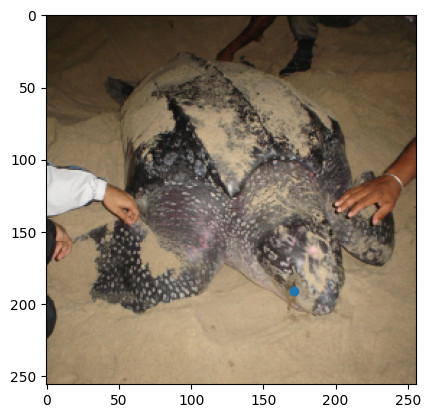

In [9]:
plt.imshow(im_crop_resize)
plt.scatter(eye_pos_shift[0][0], eye_pos_shift[0][1])